In [1]:
from utils import generate_csv

base_folder = "/Users/ramiibrahimi/Documents/testingaiexplain/base_folder/"
input_csv = "csv/my_corpus.csv"
generate_csv(base_folder, input_csv)
output_csv = "csv/"

Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 17 0 (offset 0)
Ignoring wrong pointing object 19 0 (offset 0)
Ignoring wrong pointing object 21 0 (offset 0)
Ignoring wrong pointing object 23 0 (offset 0)


In [2]:
import pandas as pd

data_url = input_csv
data_df = pd.read_csv(data_url)

In [3]:
from chunking import chunk_free_form


def handle_free_form(content, similarity_threshold=0.6, max_tokens=300):
    sents = chunk_free_form.split_into_sentences(content)
    embeddings = chunk_free_form.embed_sentences(sents)
    similarity_threshold = similarity_threshold
    max_tokens = max_tokens
    merged_sents = chunk_free_form.merge_sentences_leiden(
        sents,
        embeddings,
        max_token_limit=max_tokens,
        similarity_threshold=similarity_threshold,
    )
    return merged_sents

In [4]:
from chunking import chunk_sections
from chunking.chunk_merge import merge_line_chunks
from chunking.extract_sections import parse_resume_sections


def handle_resume(content):
    lines = chunk_sections.parse_into_lines(content)
    table1 = chunk_sections.generate_line_features(lines)
    merged_lines = merge_line_chunks(table1)
    table2 = chunk_sections.generate_line_features(merged_lines)
    parsed_resume = parse_resume_sections(table2)
    return parsed_resume

Device set to use mps:0
Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


2025-04-05 14:06:13 INFO: Downloaded file to /Users/ramiibrahimi/stanza_resources/resources.json
2025-04-05 14:06:13 INFO: Downloading default packages for language: en (English) ...
2025-04-05 14:06:14 INFO: File exists: /Users/ramiibrahimi/stanza_resources/en/default.zip
2025-04-05 14:06:15 INFO: Finished downloading models and saved to /Users/ramiibrahimi/stanza_resources
2025-04-05 14:06:15 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-04-05 14:06:15 INFO: Downloaded file to /Users/ramiibrahimi/stanza_resources/resources.json
2025-04-05 14:06:15 WARNING: Language en package default expects mwt, which has been added
2025-04-05 14:06:16 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |

2025-04-05 14:06:16 INFO: Using device: cpu
2025-04-05 14:06:16 INFO: Loading: tokenize
2025-04-05 14:06:16 INFO: Loading: mwt
2025-04-05 14:06:16 INFO: Loading: pos
2025-04-05 14:06:17 INFO: Loading: lemma
2025-04-05 14:06:17 INFO: Loading: constituency
2025-04-05 14:06:18 INFO: Loading: depparse
2025-04-05 14:06:18 INFO: Done loading processors!


2025-04-05 14:06:18 INFO: Downloaded file to /Users/ramiibrahimi/stanza_resources/resources.json
2025-04-05 14:06:18 INFO: Downloading default packages for language: en (English) ...
2025-04-05 14:06:19 INFO: File exists: /Users/ramiibrahimi/stanza_resources/en/default.zip
2025-04-05 14:06:20 INFO: Finished downloading models and saved to /Users/ramiibrahimi/stanza_resources
2025-04-05 14:06:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-04-05 14:06:20 INFO: Downloaded file to /Users/ramiibrahimi/stanza_resources/resources.json
2025-04-05 14:06:20 WARNING: Language en package default expects mwt, which has been added
2025-04-05 14:06:21 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |

2025-04-05 14:06:21 INFO: Using device: cpu
2025-04-05 14:06:21 INFO: Loading: tokenize
2025-04-05 14:06:21 INFO: Loading: mwt
2025-04-05 14:06:21 INFO: Loading: pos
2025-04-05 14:06:21 INFO: Loading: lemma
2025-04-05 14:06:22 INFO: Loading: constituency
2025-04-05 14:06:22 INFO: Loading: depparse
2025-04-05 14:06:22 INFO: Done loading processors!


In [5]:
def process_dataframe(data_df):
    parsed_resumes = {}
    parsed_essays = {}
    for index, row in data_df.iterrows():
        content = row["content"]
        doc_id = row["id"]
        if row["doc_type"] == "Resumes":
            # Assuming handle_resume returns a dictionary with key/value pairs
            parsed_resume = handle_resume(content=content)
            parsed_resumes[doc_id] = parsed_resume
        else:
            # Assuming handle_free_form returns a list of sentences/contents
            sents = handle_free_form(content=content)
            parsed_essays[doc_id] = sents
    return parsed_resumes, parsed_essays

In [6]:
import csv
import os


def create_resumes_csv(parsed_resumes, directory):
    # Ensure the target directory exists
    os.makedirs(directory, exist_ok=True)
    csv_file_path = os.path.join(directory, "resumes.csv")

    # Build a list of rows. For each resume, add the id as a new key.
    rows = []
    all_keys = set()
    for resume_id, resume_data in parsed_resumes.items():
        # Create a new dictionary that includes the resume id as "id"
        row_dict = {"id": resume_id}
        row_dict.update(resume_data)
        rows.append(row_dict)
        all_keys.update(row_dict.keys())

    # Ensure "id" is the first column
    all_keys = list(all_keys)
    if "id" in all_keys:
        all_keys.remove("id")
        all_keys = ["id"] + sorted(all_keys)
    else:
        all_keys = sorted(all_keys)

    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=all_keys)
        writer.writeheader()
        for row in rows:
            writer.writerow(row)

In [7]:
import csv
import os


def create_essays_csv(parsed_essays, directory):
    # Ensure the target directory exists
    os.makedirs(directory, exist_ok=True)
    csv_file_path = os.path.join(directory, "essays.csv")

    # Write the data to the CSV file with header "id" and "content"
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["id", "content"])
        for essay_id, contents in parsed_essays.items():
            for content in contents:
                writer.writerow([essay_id, content])

In [8]:
import csv
import os


def create_combined_csv(parsed_resumes, parsed_essays, directory):
    # Ensure the target directory exists
    os.makedirs(directory, exist_ok=True)
    csv_file_path = os.path.join(directory, "combined.csv")

    # Open the file and write the header and rows
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csvfile:
        fieldnames = ["id", "category", "content"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Process resumes: each key/value pair becomes a separate row.
        for doc_id, resume_data in parsed_resumes.items():
            for key, value in resume_data.items():
                category = f"resume-{key}"
                writer.writerow({"id": doc_id, "category": category, "content": value})

        # Process essays: each item in the list becomes a separate row with category "free-form".
        for doc_id, essay_contents in parsed_essays.items():
            for content in essay_contents:
                writer.writerow(
                    {"id": doc_id, "category": "free-form", "content": content}
                )


=== compute_dynamic_threshold Debug ===
Percentile : 75
Raw        : 0.3680
Clamped    : 0.3680

total similarity: 0.29072049260139465
=== compute_dynamic_resolution Debug ===
n         : 26
T         : 643
S_avg     : 0.2907
base_res  : 0.6
k1        : 0.03
k2        : 0.2
R (raw)   : 0.9371
R (clamped): 0.9371
resolution: 0.9370742328512713


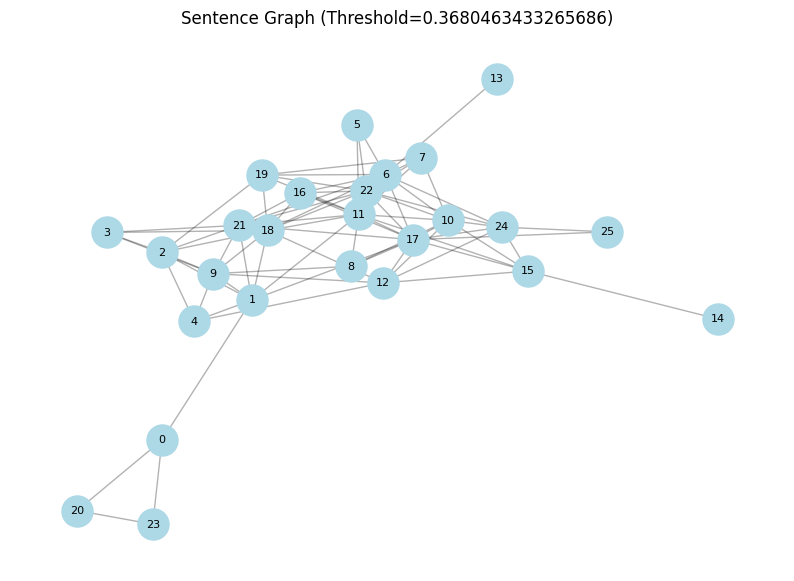


NODE REFERENCE:
[0] Shortly after my transition to the process engineer position with Philip Morris, I was charged with leading a make-shift team composed of machine operators, senior maintenance engineers and technicians for the purpose of improving one of our underperforming key performance indicators; tobacco waste. 


[1] I began by working on identifying the major loss contributors and areas for improvement and creating an action plan with targets for the next three months.  

[2] Over the course of the subsequent weekly team meetings I started perceiving that some of the team members were more concerned about their routine tasks and not fully invested in the project and were not completing their assigned tasks.

[3] To address this shortcoming, I redistributed the tasks across the team members who were more active participants and myself.

[4] We struggled to keep up, especially given technical knowledge gaps in some areas. 


[5] At the end of the month after lots of hard work 

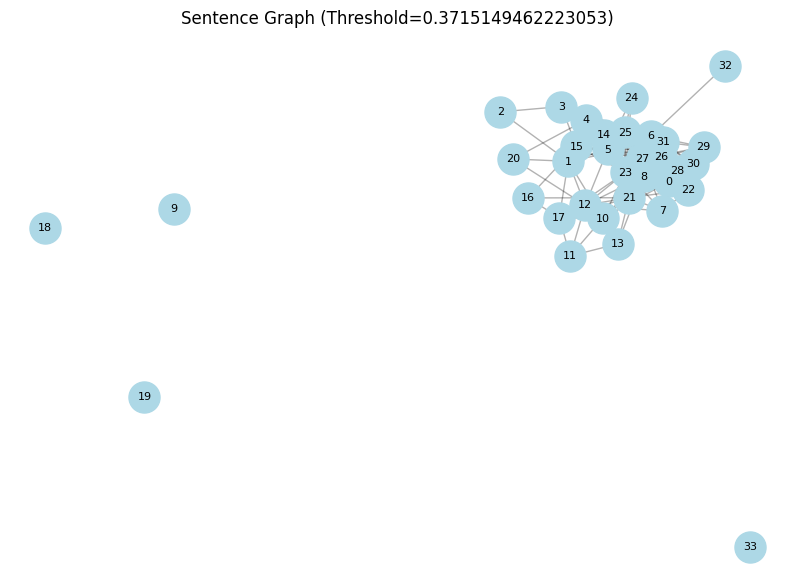


NODE REFERENCE:
[0] Given my somewhat unusual personal and professional background, I believe that I will be able
to bring a unique perspective and value to the diverse Fuqua culture.



[1] My earliest encounter with entrepreneurship came at a young age.

[2] I was 9 when a kindergarten
my parents founded opened its doors to preschoolers from around the neighborhood.

[3] Under my
mother’s management, it grew rapidly into a full-fledged school that provides high quality
education at affordable costs to around 500 students.

[4] A true team project, the whole family
contributed in one way or another to its rapid growth and success.

[5] Tutoring there during college,
working there briefly after graduation, and as a member of the decision making circle
throughout, I received valuable knowledge about business dynamics at medium to small sized
businesses, and about entrepreneurship in Jordan.



[6] I hope to share and build upon my experiences by starting a Fuqua club focused on
entrepr

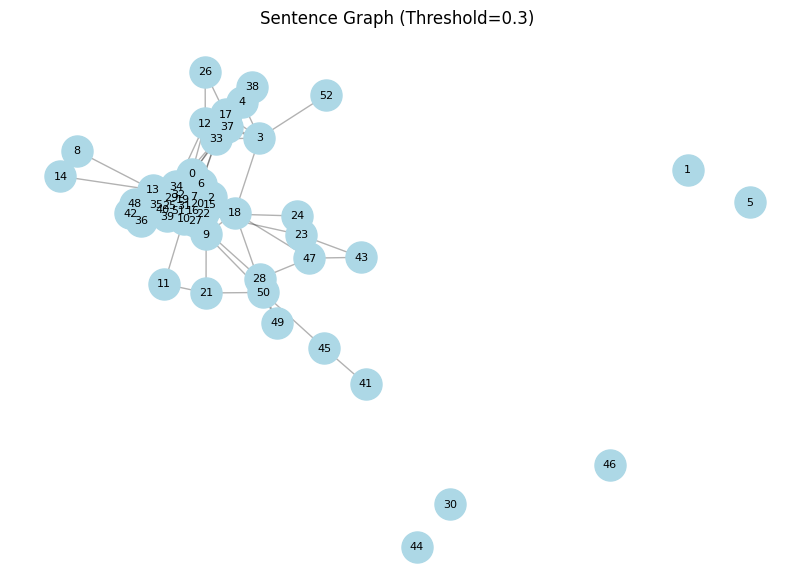


NODE REFERENCE:
[0]  1- I was born in Jordan and raised in Jordan and the UAE in a family of doctors.

[1] My parents
  strongly supported science and education.
 

[2] 2- I have itchy feet; I love to travel.

[3] I particularly enjoy embedding myself in a new culture
  among new people for a considerable period of time.

[4] One of my favorite destinations is
  Beirut, Lebanon where you can be sunbathing in wonderful weather on a beautiful beach
  and 30 minutes later you can be in skiing on the Mazaar slopes.

[5] It is indeed a chaotic city
  but that’s what I love about it.
 

[6] 3- I am a huge wildlife fanatic, next on my bucket list is a safari to Tanzania-Kenya.
 

[7] 4- I am an avid gamer.

[8] One of my most recent achievements is becoming a Level 100 colonel
  on Battlefield 4.
 

[9] 5- I am an aviation enthusiast, particularly up to date with the latest technologies from the
  likes of Lockheed Martin’s Skunk Works, the division responsible for their cutting-edge
  techn

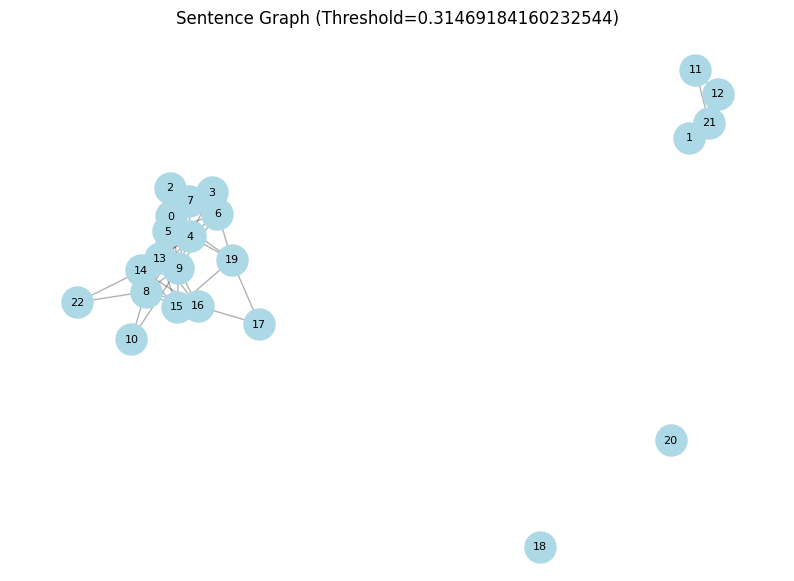


NODE REFERENCE:
[0] What is your short-term, post-MBA career goal and why?

[1] (150 words)


[2] My post-MBA career objective is to pivot into the technology industry and become a product manager within the hardware division at a major technology company such as Samsung, Apple, Alphabet, Microsoft, or Nintendo.

[3] I will leverage my technical background and my extensive experience in diverse areas including operations, finance and new product launches in a small dynamic post-acquisition environment.

[4] My subsequent exposure to the organizational dynamics and global challenges at a large affiliate with 2000 employees has further refined my skills and prepared me for my desired career.


[5] Since childhood, I have been passionate about technology, assembling my first personal computer at 7, developing android applications, and studying mechatronics engineering.

[6] Anxiously interested in news about a new device or innovation, I always wanted to be part of the teams bringing suc

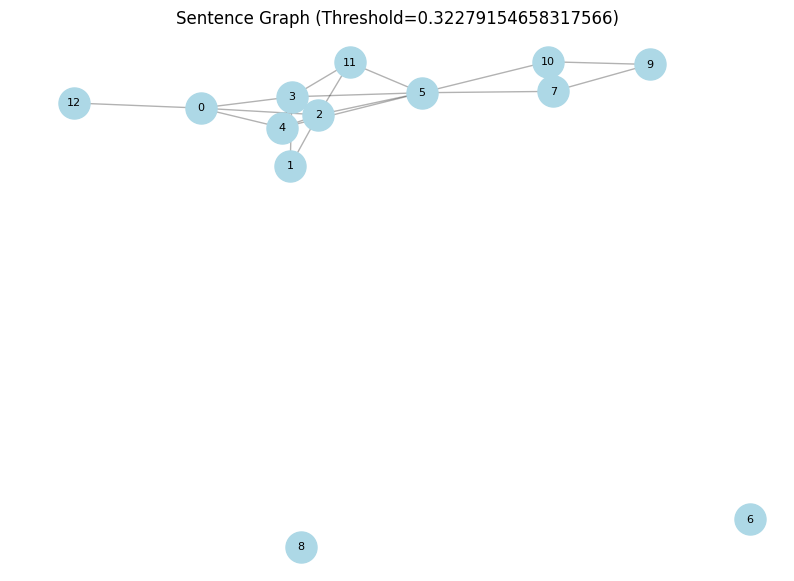


NODE REFERENCE:
[0] College Extracurriculars and Employment – 200 
-Co-founder and member of the support community for the exchage for supplemental academic material and organisation of student-led support lectures/

[1] Aug 2009 - Jan 2013 
-Volunteer lecturing for Assembly Language & Microprocessors and Design of Embedded Systems support classes at the University of Jordan/ Jan 2012
-Part time tutor at the family founded school - Scientific Reyada School/Jan 2008 - Jul 2011 
-Delegate at model united nations organized by Princess Sumayya University of Technology/ Summer 2012	
What is your short-term, post-MBA career goal and why?

[2] (150 words)
Please list the professional associations and community activities (clubs, faith-based, civic, etc.) in which you have participated since graduation from university.

[3] If you graduated from university more than ten (10) years ago, please simply list your activities for the past five (5) years. 

[4] It would be helpful to include:
The or

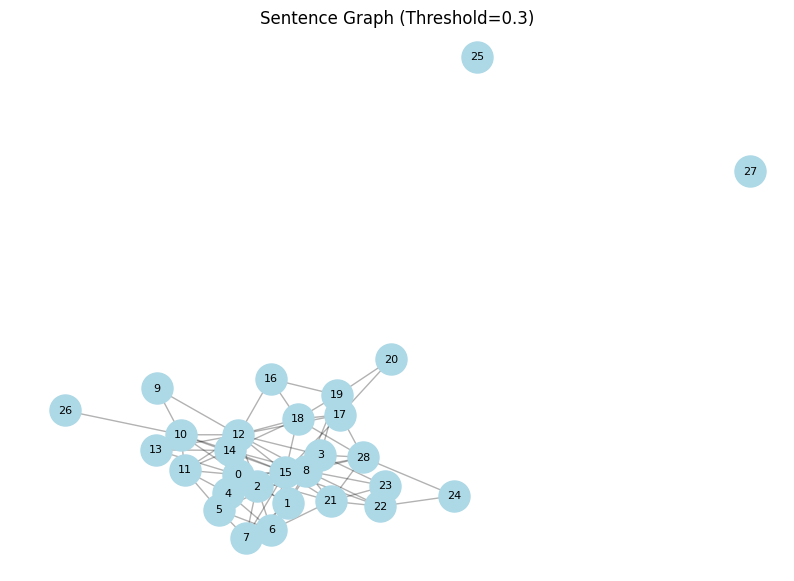


NODE REFERENCE:
[0] College was without doubt the roughest time in my life.

[1] I grew up in an academically oriented family.

[2] My
parents were adamant about education and strove to provide the best quality of education their means
allowed.

[3] Against my parents’ advice, who wanted me to study medicine, I elected to pursue my passion
for technology and earn a degree in Mechatronics Engineering.



[4] Shortly after beginning college at the University of Jordan I realized that the school was in a state of rapid
decline.

[5] Classes were extremely overcrowded, the aging infrastructure was crumbling, and the previously
Western educated faculty was being replaced by a locally educated, less-qualified cohort.

[6] Despite being
the most selective school in the country and thereby having some of the most highly qualified students,
class failure rates were upwards of 60%.

[7] Students often repeated courses five or six times.



[8] I began searching for opportunities to transfer to 

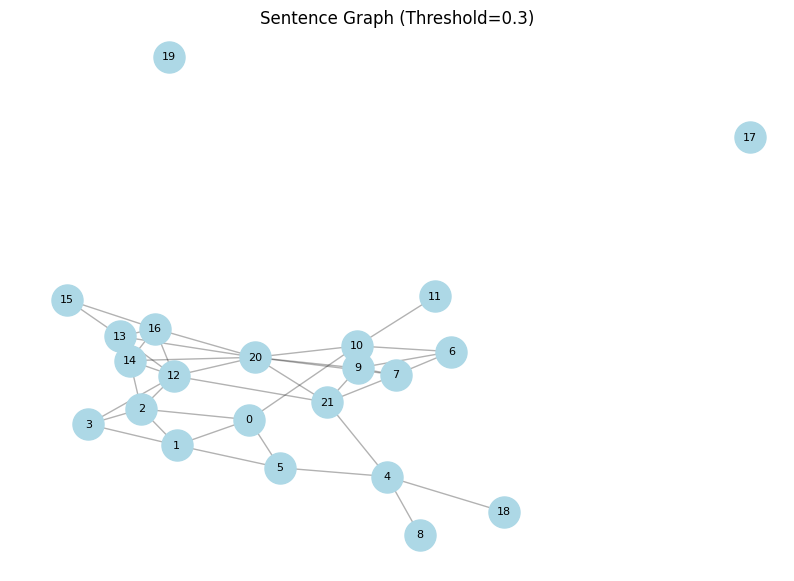


NODE REFERENCE:
[0] Shortly after beginning my undergraduate study at the University of Jordan I realized that the school was in a state of rapid decline.

[1] The classes were extremely overcrowded, the aging infrastructure was crumbling, and the previously Western educated faculty was gradually being replaced by a locally educated, less-qualified cohort.

[2] Despite being the most selective school in the country and thereby having some of the most highly qualified students, class failure rates on numerous courses were reaching upwards of 60%.

[3] It was not uncommon for students to repeat courses five or six times.


[4] As I felt consumed by the stigma of failure, I did not want to go back to my family and disappoint them.

[5] I felt increasingly isolated and I did not know where to turn for guidance.


[6] Fortunately, things took a turn for the better after I started at Philip Morris International.

[7] I thought of working life as a fresh start.

[8] I was determined to never

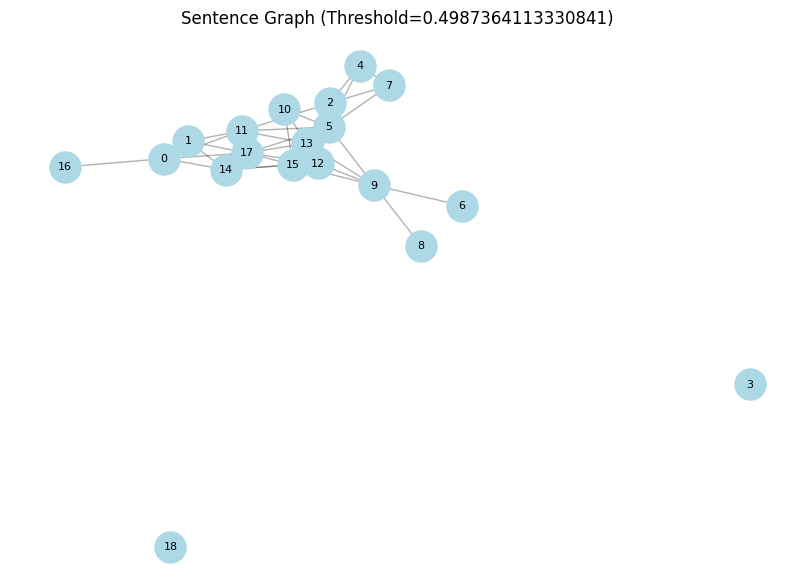


NODE REFERENCE:
[0] Dear Hiring Team at Mastercard,

I am thrilled to apply for the Manager, Product Management – Security Solutions – AI
(R-237371) position at Mastercard.

[1] With a diverse background in engineering, strategy, and
operations across Jordan, the UAE, Turkey, and the United States, I bring a global perspective
that aligns with Mastercard’s mission to advance secure and innovative payment solutions.



[2] Over the past 18 months, I have immersed myself in artiﬁcial intelligence and software
engineering, driven by the realization that generative AI will transform the global economy.


[3] Recognizing this as a critical moment, I made the deliberate decision to upskill and reskill, not
just to adapt, but to actively contribute to shaping this shift.

[4] Through an AI and Machine
Learning Bootcamp at Columbia Engineering, I gained hands-on experience with tools like
TensorFlow and PyTorch.

[5] I also pursued self-driven projects, such as developing an AI-
powered inter

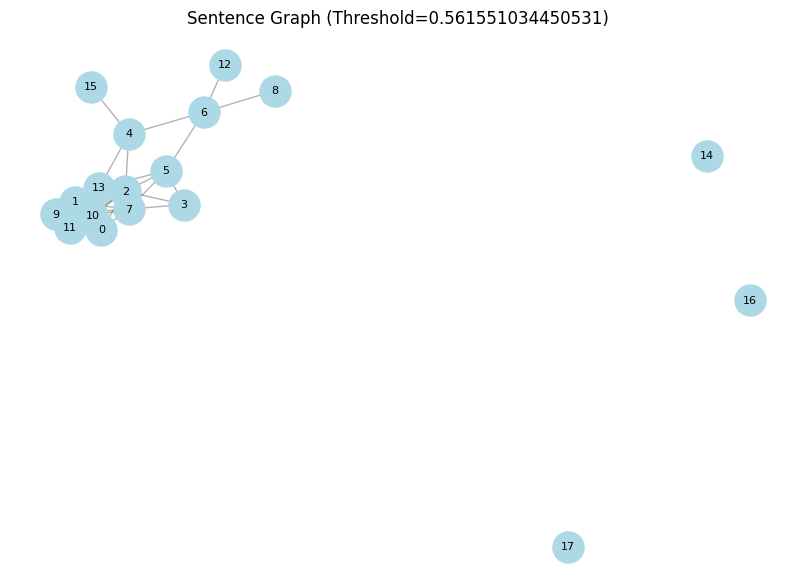


NODE REFERENCE:
[0] Dear Hiring Team,

I’m excited to apply for the Principal Program Manager role on Microsoft’s AI Red Team.

[1] The
opportunity to work on PyRIT and contribute to securing AI systems at the scale of Microsoft’s
portfolio is exactly the kind of challenge I’ve been preparing for throughout my career.



[2] Over the past 18 months, I decided to transition into a more technical role in AI and machine
learning, driven by a deep belief in the transformative potential of AI—a revolution that I see as
reshaping industries and lives faster than any before it.

[3] During this time, I completed a
bootcamp at Columbia Engineering, worked on self-driven projects like an AI-powered
transcription tool with 20% improved accuracy, and advanced my expertise in frameworks
such as TensorFlow, PyTorch, and adversarial ML techniques.

[4] This focused period of growth
reﬂects my ongoing commitment to mastering the skills required to contribute meaningfully in
this space, a journey I i

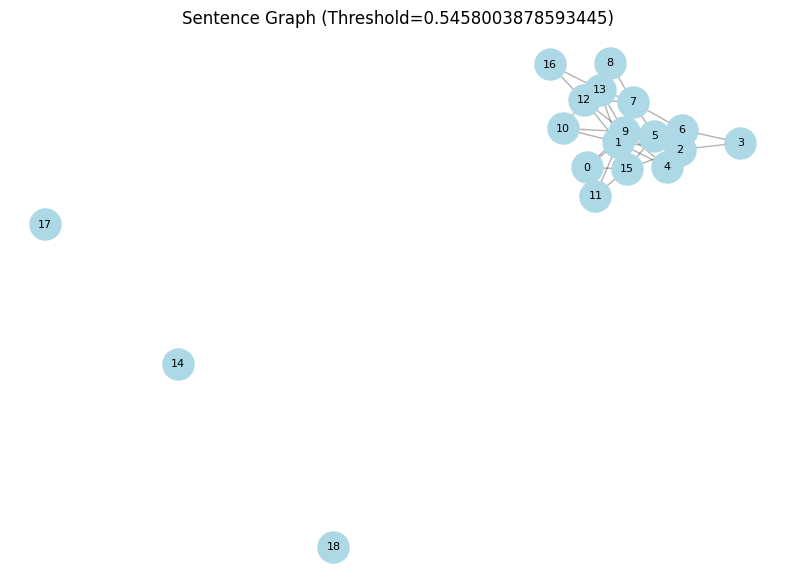


NODE REFERENCE:
[0] Dear Hiring Team,

I am excited to apply for the GenAI/Machine Learning Technical Project Manager position
within Deloitte’s Human Capital Oﬀering Portfolio.

[1] The opportunity to spearhead generative AI
initiatives that enhance organizational performance and engagement aligns closely with my
technical expertise, leadership experience, and passion for leveraging AI to solve real-world
challenges.



[2] Over the past 18 months, I have transitioned into a more technical role in AI and machine
learning, recognizing the transformative potential of this ﬁeld.

[3] During this time, I completed a
certiﬁcation in AI and machine learning at Columbia Engineering, where I gained hands-on
experience with frameworks like TensorFlow, PyTorch, and OpenAI’s GPT models.

[4] I have led
self-driven projects, such as an AI-powered transcription tool with 20% improved accuracy
and a full-stack AI-powered application integrating GPT models.

[5] These experiences reﬂect my
ability 

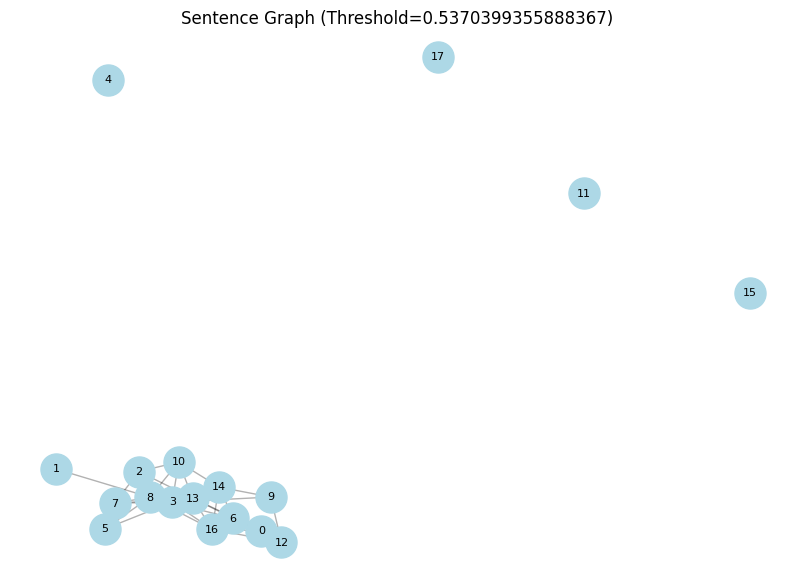


NODE REFERENCE:
[0] Dear Hiring Team at Roblox,

I am excited to apply for the Senior Product Manager role in the Creator organization at
Roblox.

[1] With a multidisciplinary background in AI, machine learning, and platform
development, combined with a passion for empowering creators and reimagining digital
experiences, I am eager to contribute my expertise to your mission of connecting people
through immersive 3D experiences.



[2] Recognizing the transformative potential of generative AI, I transitioned my career toward this
ﬁeld, completing an AI and Machine Learning Bootcamp at Columbia Engineering.

[3] My journey
has involved developing technical skills through hands-on projects, including:

•Generative AI Interfaces: Built tools integrating multiple AI models and APIs, reﬁning my
understanding of system interoperability and enabling seamless user interactions.



[4] •Custom ML Models: Designed a speech-to-text transcription system that improved baseline
accuracy by 20%, leve

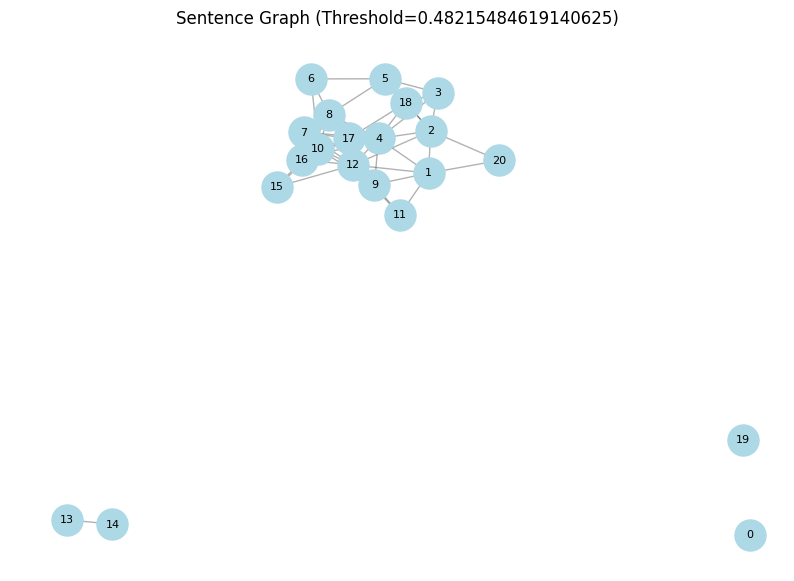


NODE REFERENCE:
[0]        RAMI I. IBRAHIMI
   2101 Arlington Blvd.#433 •                                                                                                                                         Charlottesville, VA 22903 •                                                                                    (405) 404-                                                                                   

[1] 6614•
       IbrahimiR19@darden.virginia.edu


September 16, 2018

McKinsey&Company Recruiting Team
McKinsey&Company
Gate Precinct 4, Level 4
Dubai, United Arab Emirates



[2] Dear McKinsey&Company Recruiting Team         ,

My name is Rami Ibrahimi, and I am currently a first                                                            -year student at the Darden Graduate School of
Business.

[3] I am writin         g to express my interest In the full-time associate position at McKinsey       .

[4] Having lived
and worked in                                diverse functio

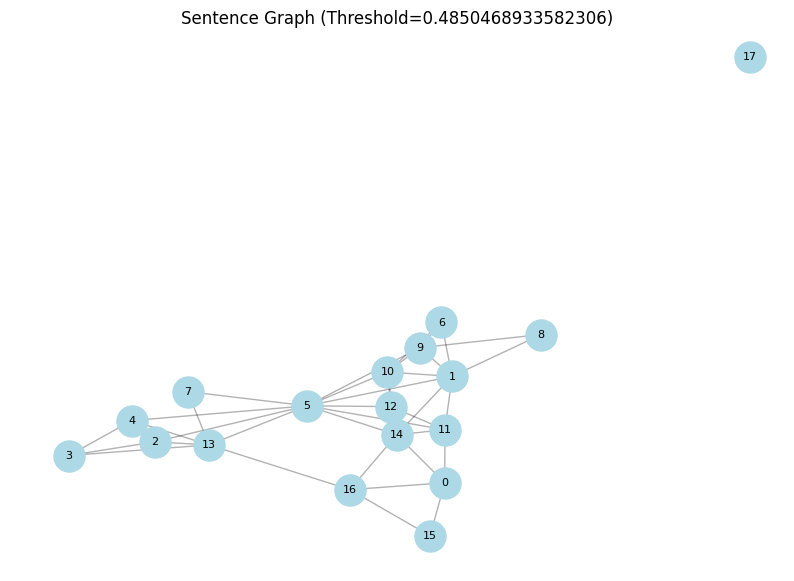


NODE REFERENCE:
[0] Dear Hiring Team at UBS,

I am excited to apply for the Product Manager, GenAI Products position at UBS.

[1] With a diverse
background in engineering, strategy, and operations across Jordan, the UAE, Turkey, and the
United States, I bring a global perspective and a deep appreciation for how technology can
drive innovation and transformation in ﬁnancial services.



[2] Over the past 18 months, I have dedicated myself to artiﬁcial intelligence and software
engineering, recognizing that generative AI is poised to revolutionize industries worldwide.

[3] This
realization led me to upskill and reskill deliberately, completing an AI and Machine Learning
Bootcamp at Columbia Engineering, where I gained hands-on experience with frameworks like
TensorFlow and PyTorch.

[4] I complemented this formal learning with self-driven projects,
including the development of an AI-powered interface integrating multiple AI models and APIs.


[5] These experiences deepened my expertise

In [9]:
parsed_resumes, parsed_essays = process_dataframe(data_df)
create_combined_csv(parsed_resumes, parsed_essays, output_csv)

In [1]:
import utils


def matching_section_header(line: str) -> str | None:
    """
    Checks if the line matches any section header label or synonym.

    :param line: The text line to evaluate.
    :return: The canonical label if matched; otherwise, None.
    """
    headings_json_path = "config/resume_headers.json"
    flat_map = utils.load_flat_labels(headings_json_path)

    normalized_line = line.strip().lower()

    # Check if the line matches any label or synonym
    if normalized_line in flat_map:
        return flat_map[normalized_line]["canonical_label"]

    return None

In [2]:
line = "my expertise"

matching_section_header = matching_section_header(line)
matching_section_header

In [3]:
headings_json_path = "config/resume_headers.json"
flat_map = utils.load_flat_labels(headings_json_path)
flat_map

{'professional experience': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'PROFESSIONAL EXPERIENCE',
  'belongs_to': None},
 'work experience': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'PROFESSIONAL EXPERIENCE',
  'belongs_to': None},
 'employment history': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'PROFESSIONAL EXPERIENCE',
  'belongs_to': None},
 'career history': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'PROFESSIONAL EXPERIENCE',
  'belongs_to': None},
 'experience': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'PROFESSIONAL EXPERIENCE',
  'belongs_to': None},
 'education': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'EDUCATION',
  'belongs_to': None},
 'academic background': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'EDUCATION',
  'belongs_to': None},
 'educational qualifications': {'label_type': 'SECTION_HEADING',
  'canonical_label': 'EDUCATION',
  'belongs_to': None},
 'education history': {'labe

In [1]:
from utils import build_synonyms_map, load_flat_labels
from chunking.chunk_free_form import find_best_label_by_embeddings


def matching_section_header(line: str) -> tuple[str, float] | str | None:
    """
    Checks if the line matches any section header label or synonym exactly.
    If not, uses an embedding-based approach to find the best match.

    :param line: The text line to evaluate.
    :return:
        - A tuple (canonical_label, similarity_score) if an embedding-based match is found above threshold
        - The canonical_label if an exact match is found
        - None if no match is found or below threshold
    """
    headings_json_path = "config/resume_headers.json"
    flat_map = load_flat_labels(headings_json_path)

    normalized_line = line.strip().lower()

    # --- Step 1: Try exact match ---
    if normalized_line in flat_map:
        return flat_map[normalized_line]["canonical_label"]

    # --- Step 2: If no exact match, try embedding-based matching ---
    synonyms_map = build_synonyms_map(flat_map)
    best_match = find_best_label_by_embeddings(
        normalized_line, synonyms_map, threshold=0.1
    )
    return best_match

    if best_match is not None:
        best_label, best_score = best_match
        return best_label, best_score

    # If we get here, no match was found or it didn't exceed threshold
    return None

In [2]:
line = "my expertise"

matching_section_header = matching_section_header(line)
print(matching_section_header)

[{'canonical_label': 'TECHNICAL SKILLS', 'average_similarity': 0.42433130741119385, 'synonyms': [{'text': 'skills', 'similarity': 0.49698182940483093}, {'text': 'technical proficiencies', 'similarity': 0.34411728382110596}, {'text': 'technologies', 'similarity': 0.3940389156341553}, {'text': 'technical skills', 'similarity': 0.4621872305870056}]}, {'canonical_label': 'PROFESSIONAL EXPERIENCE', 'average_similarity': 0.37376171350479126, 'synonyms': [{'text': 'employment history', 'similarity': 0.21163205802440643}, {'text': 'experience', 'similarity': 0.43361321091651917}, {'text': 'career history', 'similarity': 0.352868914604187}, {'text': 'work experience', 'similarity': 0.3892585039138794}, {'text': 'professional experience', 'similarity': 0.48143577575683594}]}, {'canonical_label': 'ADDITIONAL INFORMATION & PROFESSIONAL DEVELOPMENT', 'average_similarity': 0.36290600895881653, 'synonyms': [{'text': 'additional information', 'similarity': 0.4089290499687195}, {'text': 'additional inf